# Բրոունյան շարժում 

###### X(0) = X0 

##### X(t+dt) = X(t) + N(0,(delta)^2 dt;t,t+dt)

In [16]:
from scipy.stats import norm

# Պրոցեսի պարամետրեր 
delta = 0.25
dt = 0.1

# Նախնական պայման
x = 0.0

# Հաշվարկվող կրկնությունների քանակը
n = 20


for k in range(n):
    x = x + norm.rvs(scale=delta**2*dt)
    print(x)

-0.004379469763335795
0.005194824879632122
-0.0008161957360086659
0.006766948547044504
0.006442895877869474
0.01088474618114077
-0.0014560611544690329
0.01076032084935504
0.012694047654548155
0.008940569423174768
0.004554808850404703
-0.0035868135346972816
-0.0016758092893984498
-0.0002449740504132838
0.0008712710058970011
-0.011215751997088056
-0.01405776255609505
-0.004753251742705572
0.002550734082605142
0.0028010686931017144


In [24]:
#brownian()-ն իրականացնում է միաչափ բրոունյան շարժում (այսինքն՝ Wiener գործընթացը)


from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """ 
    Ստեղծենք Բրոունյան շարժման օրինակ (այսինքն Վիների գործընթաց).

        X(t) = X(0) + N(0, Δ**2 * t; 0, t)

    որտեղ N(a,b; t0, t1) նորմալ բաշխված պատահական մեծություն  է՝ a միջինով և 
    b շեղումով: t0 և t1 պարամետրերը հստակեցնում 
    են N-ի վիճակագրական անկախությունը տարբեր ժամանակային ընդմիջումներով։ Այսինքն, եթե [t0, t1) և 
    [t2, t3) անջատված միջակայքեր են, ապա N(a, b; t0, t1) և N(a, b; t2, t3) 
    անկախ են: 
    
      X(t + dt) = X(t) + N(0, Δ**2 * dt; t, t+dt
   
    x0. float կամ numpy array (կամ ինչ-որ բան, որը կարող է փոխարկվել numpy զանգվածի 
         օգտագործելով numpy.asarray(x0)): 
        Բրոունյան շարժման սկզբնական պայման(ներ)ը (այսինքն՝ դիրք(եր)): 
    n: int Կատարվող 
        քայլերի քանակը: 
    dt: float 
        Ժամանակի քայլը: 
    Δ:  float 
        Δ որոշում է Բրոունյան շարժման «արագությունը»:։ 
    out : numpy array կամ None 
        Եթե «out»-ը None չէ, այն նշում է զանգվածը, որտեղ պետք է տեղադրվի
        արդյունք, Եթե «out»-ը None է, ապա ստեղծվում և վերադարձվում է նոր numpy զանգված: 
        
      """    
    # x0-ի յուրաքանչյուր տարի համար ստեղծենք n թվերի նմուշ 
    # նորմալ բաշխումից
    x0 = np.asarray(x0)
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    #Սա հաշվարկում է Բրաունյան շարժումը՝ ձևավորելով  
    np.cumsum(r, axis=-1, out=out)


    out += np.expand_dims(x0, axis=-1)

    return out

     
    




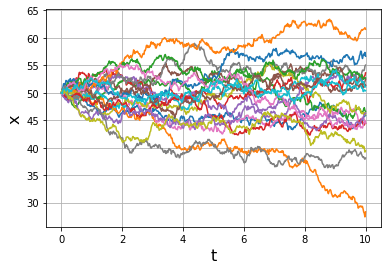

In [25]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel

#Բրոունյան շարժման պարամետր
delta = 2
#Ընդհանուր ժամանակը
T = 10.0
# Քայլերի քանակը
N = 500
# Ժամանակային քայլի չափը
dt = T/N
# Գեներացման  քանակը
m = 20
# Ստեղծենք դատարկ զանգված
x = numpy.empty((m,N+1))
#  x-ի սկզբնական արժեքները
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

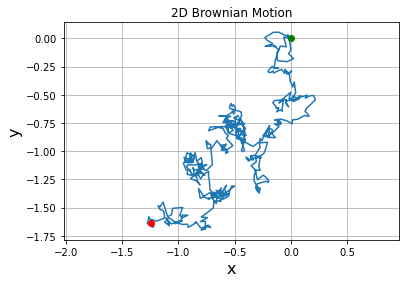

In [31]:
import numpy
from pylab import plot, show, grid, axis, xlabel, ylabel, title


delta = 0.25

T = 10.0

N = 500

dt = T/N

x = numpy.empty((2,N+1))
x[:, 0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

# Plot the 2D trajectory.
plot(x[0],x[1])


plot(x[0,0],x[1,0], "go")
plot(x[0,-1], x[1,-1], 'ro')


title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show();
